# Install and import library

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import shutil
import random
import string
import os

# Data Preparation and Data augmentation

In [10]:
# Tentukan path dataset Anda
dataset_path = "../Oprek/byPhiard/"

# Tentukan jumlah augmentasi yang diinginkan per kelas
augmentation_per_class = 650

# Inisialisasi ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=23,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.0,
    height_shift_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest" 
)

In [11]:
# Loop melalui setiap kelas
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    
    # Pastikan itu adalah direktori (bukan file)
    if os.path.isdir(class_path):
        
        # Loop melalui setiap gambar dalam kelas
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            
            # Pastikan itu adalah file gambar
            if os.path.isfile(img_path):
                # Baca gambar dan ubah menjadi array
                img = image.load_img(img_path, target_size=(224, 224))
                aug = image.img_to_array(img)
                aug = np.expand_dims(aug, axis=0)
                
                # Generate augmented images dan simpan di folder yang sama
                i = 0
                for batch in datagen.flow(aug, batch_size=64, save_to_dir=class_path, save_prefix=f"{img_file[:-4]}_aug", save_format="png"):
                    i += 1
                    if i >= augmentation_per_class:
                        break
                break

# Visualize data

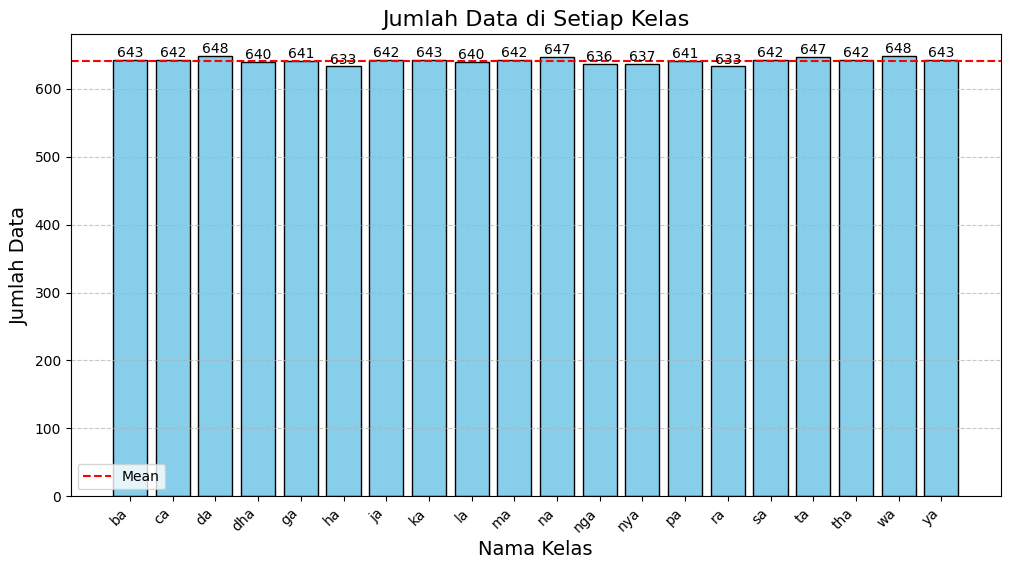

In [12]:
# Inisialisasi dictionary untuk menyimpan jumlah setiap kelas
counter_kelas = {}

# Menghitung jumlah setiap kelas
for kelas_folder in os.listdir(dataset_path):
    kelas_folder_path = os.path.join(dataset_path, kelas_folder) 
    
    # Memastikan bahwa yang sedang diiterasi adalah direktori (bukan file)
    if os.path.isdir(kelas_folder_path):
        # Inisialisasi hitungan untuk kelas tertentu
        kelas_counter = 0
        
        # Menghitung jumlah file PNG di dalam subfolder
        for file in os.listdir(kelas_folder_path):
            if file.lower().endswith('.png'):
                kelas_counter += 1
        
        # Menyimpan jumlah file PNG untuk kelas tertentu
        counter_kelas[kelas_folder] = kelas_counter
        
# Memisahkan nama kelas dan jumlah
kelas = list(counter_kelas.keys())
jumlah = list(counter_kelas.values())

# Membuat diagram batang dengan label dan warna yang berbeda
fig, ax = plt.subplots(figsize=(12, 6))  # Mengatur ukuran figur
bars = ax.bar(kelas, jumlah, color='skyblue', edgecolor='black')  # Menyesuaikan warna batang

# Menambahkan label dan judul
plt.xlabel('Nama Kelas', fontsize=14)  # Menyesuaikan ukuran font dan label sumbu x
plt.ylabel('Jumlah Data', fontsize=14)  # Menyesuaikan ukuran font dan label sumbu y
plt.title('Jumlah Data di Setiap Kelas', fontsize=16)  # Menyesuaikan ukuran font judul

# Menambahkan label pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')  # Menyesuaikan ukuran font dan warna teks

# Menyesuaikan tampilan sumbu x
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotasi label sumbu x, penempatan horizontal, dan ukuran font

# Menyesuaikan tampilan sumbu y
plt.yticks(fontsize=10)  # Menyesuaikan ukuran font sumbu y

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan garis horizontal pada mean atau median (opsional)
plt.axhline(y=np.mean(jumlah), color='red', linestyle='--', label='Mean')  # Atau ganti dengan np.median(jumlah) untuk median
plt.legend()

# Menampilkan diagram batang
plt.show()

# Mengatasi Imbalanced Data

In [13]:
# # List kelas
# kelas_aksara = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# # Target jumlah gambar per kelas
# target_jumlah = 650

In [14]:
# # Loop untuk setiap kelas
# for kelas in kelas_aksara:
#     # Path kelas
#     kelas_path = os.path.join(dataset_path, kelas)
    
#     # Jumlah gambar saat ini
#     jumlah_gambar = len(os.listdir(kelas_path))
    
#     # Selisih gambar yang perlu ditambahkan
#     selisih = target_jumlah - jumlah_gambar
    
#     # Jika selisih positif, lakukan oversampling
#     if selisih > 0:
#         # Ambil sampel acak dari gambar yang sudah ada
#         gambar_oversampling = random.sample(os.listdir(kelas_path), selisih)
        
#         # Copy gambar oversampling ke dalam kelas
#         for gambar in gambar_oversampling:
#             source_path = os.path.join(kelas_path, gambar)
            
#             # Generate sufiks acak
#             sufiks_acak = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
            
#             # Tentukan path tujuan dengan menambahkan sufiks acak
#             target_path = os.path.join(kelas_path, f'{os.path.splitext(gambar)[0]}_{sufiks_acak}{os.path.splitext(gambar)[1]}')
            
#             # Salin gambar ke target path
#             shutil.copy(source_path, target_path)

In [15]:
# # Cetak ulang jumlah gambar per kelas setelah penyamaan
# for kelas in kelas_aksara:
#     kelas_path = os.path.join(dataset_path, kelas)
#     jumlah_gambar = len(os.listdir(kelas_path))
#     print(f'Aksara {kelas} jumlah: {jumlah_gambar}')

In [16]:
# # Fungsi untuk menghitung jumlah gambar per kelas 
# def count_images_per_class(folder_path):
#     class_counts = {}
#     for class_folder in os.listdir(folder_path):
#         class_path = os.path.join(folder_path, class_folder)
        
#         # Pastikan itu adalah direktori (bukan file)
#         if os.path.isdir(class_path):
#             # Hitung jumlah gambar dalam kelas
#             num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
#             class_counts[class_folder] = num_images
#     return class_counts

# # Hitung jumlah gambar per kelas sebelum augmentasi
# original_counts = count_images_per_class(dataset_path)
# print("Jumlah gambar per kelas :")
# print(original_counts)